# Test algoritama na MNIST setu podataka

### MNIST

Usporedba algoritama izvršit će se na treniranju neuronske mreže za raspoznavanje znamenki od $0$ do $9$. Ulazni podatak u neuronsku mrežu je grayscale slika dimenzija $28 \times 28$ kolike su dimenzije slika u bazi [MNIST](http://yann.lecun.com/exdb/mnist/). Baza sadrži $60000$ trening slika i $10000$ test slika.

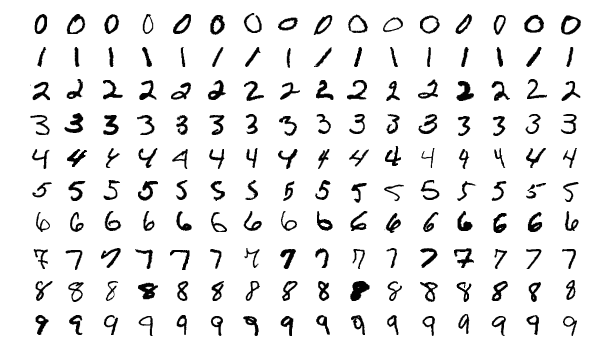


## Klasa za testiranje algoritama: *model*

U svrhu lakšeg kreiranja neuronskih mreža i testiranja algoritama stvorena je klasa **model** koja služi kao svojevrsni API nad TensorFlow knjižicom. Cijela neuronska mreža zadaje se pomoću $9$ metoda:

1. *setLayersNeurons* - prima listu koja ima definiran broj neurona po sloju počevši s prvim skrivenim slojem. Primjerice neuronska mreža koja ima topologiju 500,200,200 i izlaz 1 zadala bi se pomoću *setLayersNeurons([500,200,200,1])*.<br><br>

2. *setActivations* - prima listu koja ima definirane aktivacijske funkcije. Primjerice ako želimo da prva dva sloja imaju Relu kao aktivacijsku funkciju, a zadnja dva da budu bez aktivacije, poziv metode je sljedeći: *setActivations(['relu','relu',None,None])* Implementirane aktivacijske funkcije jesu:
    
    * 'relu' - [Rectified Linear Unit](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)).
    * 'elu'  - [Exponential linear unit](https://sefiks.com/2018/01/02/elu-as-a-neural-networks-activation-function/).
    * 'sig' - [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function).
    * 'tanh' - [Hyperbolic Tangent Activation Function](https://theclevermachine.wordpress.com/tag/tanh-function/).
    * None - Kada ne želimo imati aktivacijsku funkciju nad slojem.
<br><br>   
3. *setRugluarizations* - Metoda koja dodaje svakom sloju regularizaciju. Implementirane su dvije vrste regularizacije: *l1* i *l2* regularizacija. Uz svaku regularizaciju potrebno je dodati i regularizacijski parametar, stoga korištenje ove funkcije jest sljedeće: *setRegularization([['l2',0.001],['l2',0.001],['l1',0.01],None])* gdje se na prva dva sloja postavlja regularizacija *l2* s regularizacijskim parametrom $0.001$, na treći sloj se postavlja regularizacije *l1* s regularizacijskim parametrom $0.01$, dok četvrti sloj nema regularizacije.
<br><br>
4. *setBatchNormalization* - Metoda koja primjenjuje [Batch Normalization](https://towardsdatascience.com/batch-normalization-in-neural-networks-1ac91516821c) na slojeve, kao argument prima listu vrijednosti momentuma koji se koristi prilikom ažuriranja batch normalization matrice (*None* ukoliko nema normalizacije). Primjer pozivanja funkcije glasi: *setBatchNormalization([0.9, 0.9, 0.9, None])*
<br><br>
5. *setInitialisation* - Metoda koja postavlja inicijalne vrijednosti težina koje se treniraju. Implementirana je [He inicijalizacija](https://towardsdatascience.com/random-initialization-for-neural-networks-a-thing-of-the-past-bfcdd806bf9e). Korištenje jest vrlo jednostavno: *setInitialisation(['he_init','he_init','he_init',None])*. U slučaju kada se koristi *None*, težine su nasumično inicijalizirane.
<br><br>
6. *setLoss* - Metoda koja postavlja loss funkciju. Loss funkcija može biti: *softmax* ili *mse*, odnosno 
[softmax za klasifikaciju](https://deepnotes.io/softmax-crossentropy) ili [srednja kvadratna pogreška za regresiju](https://medium.freecodecamp.org/machine-learning-mean-squared-error-regression-line-c7dde9a26b93). Korištenje metode je sljedeće: *setLoss("softmax")* i *setLoss("mse")*.
<br><br>

7. *setOptimiser* - Metoda koja postavlja optimizator. Ugrađeni optimizatori su:

    * Adam - *setOptimiser(["adam", $\alpha$]=*
    * AdaGrad - *setOptimiser(["adaGrad", $\alpha$])*
    * Gradient Descent - *setOptimiser(["gradDes", $\alpha$])*
    * Momentum - *setOptimiser(["momentum", $\alpha$, $\beta$])*
    * RMSProp  - *setOptimiser(["rmsProp", $\alpha$, $\beta$])*
<br><br>

8. *setIoShape* - Metoda koja postavlja oblik ulaznih i izlaznih podataka kao i njihov tip. Za broj stupaca se tipično postavlja *None*. Metoda se poziva tako da se prvo navodi oblik ulaznog sloja, potom oblik izlaza, a zatim tipovi ulaznih i izlaznih podataka. Primjerice: *setIOshape((None,9),(None), tf.float32, tf.int32)* postavlja ulazni sloj koji će imati $9$ značajki tipa float, izlazni sloj će imati $1$ značajku i bit će tipa integer.
<br><br>

9. *setAlphaDecay* - Metoda omogućuje dodavanje raspada parametra $\alpha$. Poziva se na sljedeći način: *setAlphaDecay($\alpha_0$,$r$,$baza$)* (tipična baza je $1/10$).
<br><br>

10. *trainModel* - Metoda koja trenira model. Kao argumente prima redom: *ulazni parametri trening seta*, *izlaz trening seta*, *ulazni parametri validacijskog seta*, *izlaz validacijskog seta*, *broj epoha*, *veličina batch-a*, *early stopping kriterij* nakon kojeg se zaustavlja treniranje.

## Testirani modeli
Svi modeli su imali iste parametre:

1. Broj neurona i slojeva: 100, 100, 10,
2. Aktivacije: elu, elu None,
3. Regularizacija: ['l2',0.001],['l2',0.001], ['l2',0.001],
4. BatchNormalization: 0.9, 0.9, 0.9,
5. Inicijalizacija: He inicijalizacija, He inicijalizacija, He inicijalizacija,
6. Loss funkcija: Softmax
7. Ulazni sloj/izlazni sloj: 784 parametara tipa float/ 1 (klasa znamenke) tipa integer
8. Trenirali su se s uključenim early stop algoritmom na 10000 epoha s veličinom batch-a 200 i early stopping kriterijem nakon 50 nepromijenjenih najboljih rezultata.
9. Gradient descent i Momentum optimizator trenirali su se i sa AlphaDecay-om (parametri: 0.001,10000,1/10) 
10. Inicijalni $\alpha = 0.001$

Trening set se sastojao od $55000$ slika, a validacijski set od $5000$ slika.

In [ ]:
# Imports
import tensorflow as tf
import numpy as np
from functools import partial

class model:
    
    # Init variables
    def __init__(self):
        # Graph elements
        self.neurons = None
        self.activations = None
        self.regularization = None
        self.batchNormalisation = None
        self.initialisation = None
        self.loss = None
        self.optimiser = None
        self.decay = False
    
    # Set input/outputshape
    def setIOshape(self, inputShape, outputShape, itype = tf.float32, otype = tf.float32):
        self.inputShape = inputShape
        self.outputShape = outputShape
        self.itype= itype
        self.otype= otype
    
    # Add neurons
    def setLayersNeurons(self, neuronsPerLayer):
        self.neurons = neuronsPerLayer

    # Add activations
    def setActivations(self, activationsPerLayers):
        self.activations = activationsPerLayers
    
    # Add regularizations
    def setRegularizations(self, regularizationPerLayer):
        self.regularization = regularizationPerLayer
        
    # Add regularizations
    def setBatchNormalization(self, batchNormalizationPerLayer):
        self.batchNormalisation = batchNormalizationPerLayer
    
    # Add initialisations for weights
    def setInitialisation(self, initialisationPerLayer):
        self.initialisation = initialisationPerLayer
    
    # Set loss function
    def setLoss(self, loss):
        self.loss = loss
    
    # Set optimiser function
    def setOptimiser(self, opt):
        self.optimiser = opt
               
    # Set alphaDecay
    def setAlphaDecay(self, initAlpha, decay_steps, decay_rate):
        self.initial_learning_rate = initAlpha
        self.decay_steps = decay_steps
        self.decay_rate = decay_rate
        self.decay = True
        
    # Reset default graph
    def reset_graph(self, seed=42):
        tf.reset_default_graph()
        tf.set_random_seed(seed)
        np.random.seed(seed)
    
    # Batch shuffeling
    def shuffle_batch(self, X, y, batch_size):
        rnd_idx = np.random.permutation(len(X))
        n_batches = len(X) // batch_size
        for batch_idx in np.array_split(rnd_idx, n_batches):
            X_batch, y_batch = X[batch_idx], y[batch_idx]
            yield X_batch, y_batch

    # Train
    def trainModel(self, xTrain, yTrain, xValid, yValid, epochs, batch_size, earlyStopping = 0):
        # Building Graph
        # Check for neurons
        if (self.neurons == None):
            print("Error, no neurons added - use setLayersNeuorns method")
            return(0)
        
        elementsSum = len(self.neurons) + len(self.activations) + len(self.regularization) + len(self.batchNormalisation) + len(self.initialisation) 
        if (len(self.neurons) != elementsSum / 5):
            print("Error, invalid number of elements")
            return (0)
        
        # Reseting default graph
        self.reset_graph()
        
        # Create input/outputPlaceholders and training flag
        X = tf.placeholder(self.itype, shape = self.inputShape, name = 'X')
        y = tf.placeholder(self.otype, shape = self.outputShape, name = 'y')
        training = tf.placeholder_with_default(False, shape=(), name='training')
        
        
        # Prepare dicts
        # Initialisation
        for i, elem in enumerate(self.initialisation):
            if elem == "he_init":
                self.initialisation[i] = tf.variance_scaling_initializer()
            else:
                self.initialisation[i] = None
        
        # Regularization
        for i, elem in enumerate(self.regularization):
            if (elem == None or len(elem) != 2):
                continue
            if (elem[0] != "l1" or elem[0]!= "l2"):
                self.regularization[i] = None

            if (elem[0] == "l1"):
                self.regularization[i] = tf.contrib.layers.l1_regularizer(elem[1])
            
            if (elem[0] == "l2"):
                self.regularization[i] = tf.contrib.layers.l2_regularizer(elem[1])
        
        # Batch normalisation
        my_batch_norm_layer = partial(tf.layers.batch_normalization,training=training)
        
        # Activation function
        for i, elem in enumerate(self.activations):
            
            if elem == 'relu':
                self.activations[i] = partial(tf.nn.relu)
            if elem == 'elu':
                self.activations[i] = partial(tf.nn.elu)
            if elem == 'sig':
                self.activations[i] = partial(tf.nn.sigmoid)
            if elem == 'tanh':
                self.activations[i] = partial(tf.nn.tanh) 
            
            if (elem not in ['relu', 'elu', 'sig', 'tanh']):
                self.activations[i] = None
            
        # Build layers
        layers = [X]
        with tf.name_scope("dnn"):        
            
            for i, numberOfNeurons in enumerate(self.neurons):
                layer = tf.layers.dense(layers[i], self.neurons[i], kernel_initializer = self.initialisation[i]
                                       , kernel_regularizer = self.regularization[i], name = "hidden_"+str(i+1))
                if (self.activations[i] != None):
                    if self.batchNormalisation[i] != None:
                        layer = self.activations[i](my_batch_norm_layer(layer, momentum = self.batchNormalisation[i]))
                    else:
                        layer = self.activations[i](layer)
                else:
                    if self.batchNormalisation[i] != None:
                        layer = my_batch_norm_layer(layer, momentum = self.batchNormalisation[i])
                layers.append(layer)
        
        # Build loss
        with tf.name_scope("loss"):
            if self.loss == "softmax":
                base = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=layers[len(layers)-1])
            
            if self.loss == "mse":
                base = tf.reduce_mean(tf.square(layers[len(layers)-1] - y), name = "mse")

            base_loss = tf.reduce_mean(base, name = "base_loss")
            reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
            loss = tf.add_n([base_loss] + reg_losses, name="loss")
            
        # Build train
        with tf.name_scope("train"):
            if (len(self.optimiser) != 2 and self.optimiser[0] not in ["rmsProp", "momentum"]):
                print("Wrong set up for optimiser")
                return (0)
            global_step = tf.Variable(0, trainable = False, name="global_step")

            if (self.optimiser[0] == "gradDes"):
                if self.decay:
                    learning_rate = tf.train.exponential_decay(self.initial_learning_rate, global_step, self.decay_steps, self.decay_rate)
                else:
                    learning_rate = self.optimiser[1]
                optimizer = tf.train.GradientDescentOptimizer(learning_rate)
                
            if (self.optimiser[0] == "adaGrad"):
                if self.decay:
                    learning_rate = tf.train.exponential_decay(self.initial_learning_rate, global_step, self.decay_steps, self.decay_rate)
                else:
                    learning_rate = self.optimiser[1]
                optimizer = tf.train.AdagradOptimizer(learning_rate)
            
            if (self.optimiser[0] == "adam"):
                if self.decay:
                    learning_rate = tf.train.exponential_decay(self.initial_learning_rate, global_step, self.decay_steps, self.decay_rate)
                else:
                    learning_rate = self.optimiser[1]
                optimizer = tf.train.AdamOptimizer(learning_rate)
            
            if (self.optimiser[0] == "momentum"):
                if self.decay:
                    learning_rate = tf.train.exponential_decay(self.initial_learning_rate, global_step, self.decay_steps, self.decay_rate)
                else:
                    learning_rate = self.optimiser[1]
                optimizer = tf.train.MomentumOptimizer(learning_rate,momentum = self.optimiser[2])
            
            if (self.optimiser[0] == "rmsProp"):
                if self.decay:
                    learning_rate = tf.train.exponential_decay(self.initial_learning_rate, global_step, self.decay_steps, self.decay_rate)
                else:
                    learning_rate = self.optimiser[1]
                optimizer = tf.train.RMSPropOptimizer(learning_rate, momentum = self.optimiser[2])

            training_op = optimizer.minimize(loss, global_step = global_step)

        # Build accuracy
        with tf.name_scope("eval"):
            if self.loss == "softmax":
                correct = tf.nn.in_top_k(layers[len(layers)-1], y, 1)
                accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
            
            if self.loss == "mse":
                accuracy = tf.reduce_mean(tf.square(layers[len(layers)-1]-y))
                
        # Traning setup
        init = tf.global_variables_initializer()
        extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
        saver = tf.train.Saver()

        n_epochs = epochs
        batch_size = batch_size
        valid = []
        train = []

        # For early stopping
        if self.loss == "softmax":
            best = 0
        else:
            best = 10000
        epochBest = 0
        
        with tf.Session() as sess:
            init.run()
            for epoch in range(n_epochs):
                for X_batch, y_batch in self.shuffle_batch(X_train, y_train, batch_size):
                    sess.run([training_op, extra_update_ops],
                             feed_dict={training: True, X: X_batch, y: y_batch})
                accuracy_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
                accuracy_train = accuracy.eval(feed_dict={X: X_train, y: y_train})
                
                valid.append(accuracy_val)
                train.append(accuracy_train)
                print(epoch, "Validation accuracy:", accuracy_val, "Train accuracy:", accuracy_train, best)
                if self.loss == "softmax":
                    if accuracy_val > best :
                        best = accuracy_val
                        epochBest = epoch
                        save_path = saver.save(sess, "./my_model_final.ckpt")
                else:
                    if accuracy_val < best:
                        best = accuracy_val
                        epochBest = epoch
                        save_path = saver.save(sess, "./my_model_final.ckpt")
                if earlyStopping != 0 and epoch - epochBest > earlyStopping:
                    print("EARLY STOPPING")
                    break
        return (valid,train,best,epochBest)

In [ ]:
import tensorflow as tf
from sklearn.utils import shuffle
# Data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_original = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_original = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)


n,m = X_original.shape

# Pohrana rezultata
rmsPropBest = []
rmsPropEpoch = []
gradDescBest = []
gradDescEpoch = []
adaGradBest = []
adaGradEpoch = []
momentumBest = []
momentumEpoch = []
adamBest = []
adamEpoch = []

# Treniranje
for i in range(100):
    print (i)
    X_train, y_train = shuffle(X_original, y_original)
    X_valid, X_train = X_train[:5000], X_train[5000:]
    y_valid, y_train = y_train[:5000], y_train[5000:]
    
    #Izgradnja modela
    myModel = model()
    myModel.setLayersNeurons([100,100,10])
    myModel.setActivations(['elu','elu', None])
    myModel.setRegularizations([['l2',0.001],['l2',0.001], ['l2',0.001]])
    myModel.setBatchNormalization([0.9,0.9, 0.9])
    myModel.setInitialisation(['he_init','he_init','he_init'])
    myModel.setLoss("softmax")
    myModel.setOptimiser(["rmsProp",0.001,0.9])
    myModel.setIOshape((None,m),(None), tf.float32, tf.int32)

    myModel2 = model()
    myModel2.setLayersNeurons([100,100,10])
    myModel2.setActivations(['elu','elu', None])
    myModel2.setRegularizations([['l2',0.001],['l2',0.001], ['l2',0.001]])
    myModel2.setBatchNormalization([0.9,0.9, 0.9])
    myModel2.setAlphaDecay(0.1,10000,1/10)
    myModel2.setInitialisation(['he_init','he_init','he_init'])
    myModel2.setLoss("softmax")
    myModel2.setOptimiser(["gradDes",0.001])
    myModel2.setIOshape((None,m),(None), tf.float32, tf.int32)

    myModel3 = model()
    myModel3.setLayersNeurons([100,100,10])
    myModel3.setActivations(['elu','elu', None])
    myModel3.setRegularizations([['l2',0.001],['l2',0.001], ['l2',0.001]])
    myModel3.setBatchNormalization([0.9,0.9, 0.9])
    myModel3.setInitialisation(['he_init','he_init','he_init'])
    myModel3.setLoss("softmax")
    myModel3.setOptimiser(["adaGrad",0.001])
    myModel3.setIOshape((None,m),(None), tf.float32, tf.int32)

    myModel4 = model()
    myModel4.setLayersNeurons([100,100,10])
    myModel4.setActivations(['elu','elu', None])
    myModel4.setRegularizations([['l2',0.001],['l2',0.001], ['l2',0.001]])
    myModel4.setBatchNormalization([0.9,0.9, 0.9])
    myModel4.setAlphaDecay(0.1,10000,1/10)
    myModel4.setInitialisation(['he_init','he_init','he_init'])
    myModel4.setLoss("softmax")
    myModel4.setOptimiser(["momentum",0.001,0.9])
    myModel4.setIOshape((None,m),(None), tf.float32, tf.int32)

    myModel5 = model()
    myModel5.setLayersNeurons([100,100,10])
    myModel5.setActivations(['elu','elu', None])
    myModel5.setRegularizations([['l2',0.001],['l2',0.001], ['l2',0.001]])
    myModel5.setBatchNormalization([0.9,0.9, 0.9])
    myModel5.setInitialisation(['he_init','he_init','he_init'])
    myModel5.setLoss("softmax")
    myModel5.setOptimiser(["adam",0.001])
    myModel5.setIOshape((None,m),(None), tf.float32, tf.int32)
    
    # Treniranje
    valid1, train1, best1, epochBest1 = myModel.trainModel(X_train, y_train, X_valid, y_valid, 10000, 200, earlyStopping = 50)
    valid2, train2, best2, epochBest2 = myModel2.trainModel(X_train, y_train, X_valid, y_valid, 10000, 200, earlyStopping = 50)
    valid3, train3, best3, epochBest3 = myModel3.trainModel(X_train, y_train, X_valid, y_valid, 10000, 200, earlyStopping = 50)
    valid4, train4, best4, epochBest4 = myModel4.trainModel(X_train, y_train, X_valid, y_valid, 10000, 200, earlyStopping = 50)
    valid5, train5, best5, epochBest5 = myModel5.trainModel(X_train, y_train, X_valid, y_valid, 10000, 200, earlyStopping = 50)
    
    # Pohrana podataka
    rmsPropBest.append(best1)
    rmsPropEpoch.append(epochBest1)
    gradDescBest.append(best2)
    gradDescEpoch.append(epochBest2)
    adaGradBest.append(best3)
    adaGradEpoch.append(epochBest3)
    momentumBest.append(best4)
    momentumEpoch.append(epochBest4)
    adamBest.append(best5)
    adamEpoch.append(epochBest5)
    

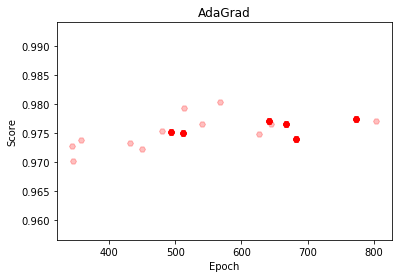

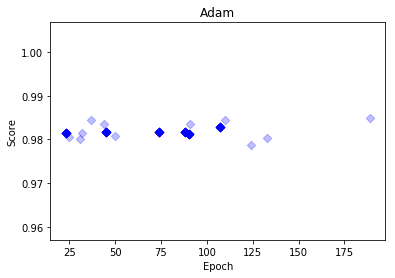

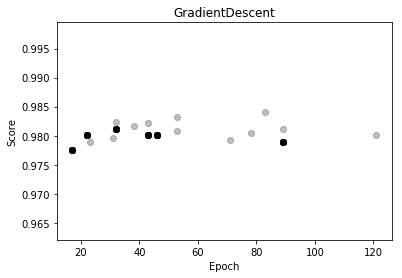

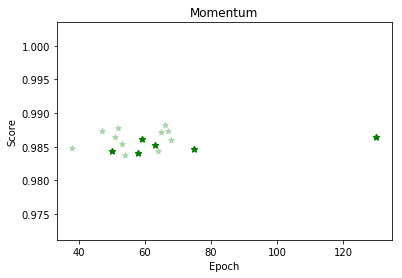

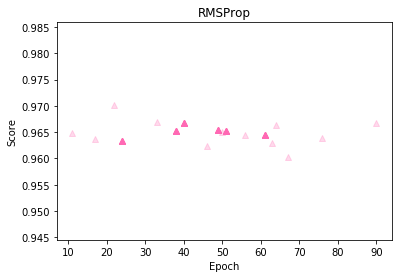

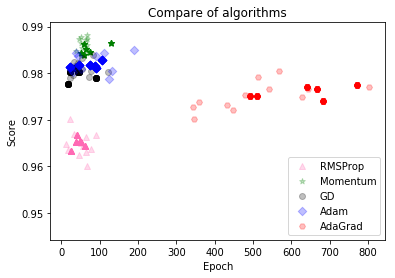

In [2]:
# Učitavanje potrebnih knjižica
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

adaGradScore = np.array([0.9728, 0.9702, 0.9754, 0.9732, 0.977, 0.9792, 0.9804, 0.9722, 0.9766, 0.9766, 0.9748, 0.9738, 0.9774, 0.974, 0.977, 0.9766, 0.975, 0.9752, 0.9774, 0.974, 0.977, 0.9766, 0.975, 0.9752, 0.9774, 0.974, 0.977, 0.9766, 0.975, 0.9752, 0.9774, 0.974, 0.977, 0.9766, 0.975, 0.9752, 0.9774, 0.974, 0.977, 0.9766, 0.975, 0.9752, 0.9774, 0.974, 0.977, 0.9766, 0.975, 0.9752, 0.9774, 0.974, 0.977, 0.9766, 0.975, 0.9752, 0.9774, 0.974, 0.977, 0.9766, 0.975, 0.9752, 0.9774, 0.974, 0.977, 0.9766, 0.975, 0.9752, 0.9774, 0.974, 0.977, 0.9766, 0.975, 0.9752, 0.9774, 0.974, 0.977, 0.9766, 0.975, 0.9752, 0.9774, 0.974, 0.977, 0.9766, 0.975, 0.9752, 0.9774, 0.974, 0.977, 0.9766, 0.975, 0.9752, 0.9774, 0.974, 0.977, 0.9766, 0.975, 0.9752, 0.9774, 0.974, 0.977, 0.9766])
adaGradEpoch = np.array([344, 346, 480, 432, 804, 513, 567, 449, 541, 644, 627, 358, 773, 682, 642, 668, 511, 493, 773, 682, 642, 668, 511, 493, 773, 682, 642, 668, 511, 493, 773, 682, 642, 668, 511, 493, 773, 682, 642, 668, 511, 493, 773, 682, 642, 668, 511, 493, 773, 682, 642, 668, 511, 493, 773, 682, 642, 668, 511, 493, 773, 682, 642, 668, 511, 493, 773, 682, 642, 668, 511, 493, 773, 682, 642, 668, 511, 493, 773, 682, 642, 668, 511, 493, 773, 682, 642, 668, 511, 493, 773, 682, 642, 668, 511, 493, 773, 682, 642, 668])

adamScore = np.array([0.9802, 0.9808, 0.985, 0.9814, 0.9836, 0.9836, 0.9844, 0.9804, 0.9806, 0.9844, 0.9788, 0.9818, 0.9816, 0.9818, 0.9812, 0.9814, 0.9828, 0.9818, 0.9816, 0.9818, 0.9812, 0.9814, 0.9828, 0.9818, 0.9816, 0.9818, 0.9812, 0.9814, 0.9828, 0.9818, 0.9816, 0.9818, 0.9812, 0.9814, 0.9828, 0.9818, 0.9816, 0.9818, 0.9812, 0.9814, 0.9828, 0.9818, 0.9816, 0.9818, 0.9812, 0.9814, 0.9828, 0.9818, 0.9816, 0.9818, 0.9812, 0.9814, 0.9828, 0.9818, 0.9816, 0.9818, 0.9812, 0.9814, 0.9828, 0.9818, 0.9816, 0.9818, 0.9812, 0.9814, 0.9828, 0.9818, 0.9816, 0.9818, 0.9812, 0.9814, 0.9828, 0.9818, 0.9816, 0.9818, 0.9812, 0.9814, 0.9828, 0.9818, 0.9816, 0.9818, 0.9812, 0.9814, 0.9828, 0.9818, 0.9816, 0.9818, 0.9812, 0.9814, 0.9828, 0.9818, 0.9816, 0.9818, 0.9812, 0.9814, 0.9828, 0.9818, 0.9816, 0.9818, 0.9812, 0.9814])
adamEpoch = np.array([31, 50, 189, 32, 44, 91, 37, 133, 25, 110, 124, 45, 88, 74, 90, 23, 107, 45, 88, 74, 90, 23, 107, 45, 88, 74, 90, 23, 107, 45, 88, 74, 90, 23, 107, 45, 88, 74, 90, 23, 107, 45, 88, 74, 90, 23, 107, 45, 88, 74, 90, 23, 107, 45, 88, 74, 90, 23, 107, 45, 88, 74, 90, 23, 107, 45, 88, 74, 90, 23, 107, 45, 88, 74, 90, 23, 107, 45, 88, 74, 90, 23, 107, 45, 88, 74, 90, 23, 107, 45, 88, 74, 90, 23, 107, 45, 88, 74, 90, 23])

gdScore = np.array([0.9796, 0.9808, 0.9822, 0.9792, 0.9802, 0.9824, 0.9832, 0.9804, 0.9816, 0.984, 0.979, 0.9812, 0.979, 0.9776, 0.9802, 0.9802, 0.9802, 0.9812, 0.979, 0.9776, 0.9802, 0.9802, 0.9802, 0.9812, 0.979, 0.9776, 0.9802, 0.9802, 0.9802, 0.9812, 0.979, 0.9776, 0.9802, 0.9802, 0.9802, 0.9812, 0.979, 0.9776, 0.9802, 0.9802, 0.9802, 0.9812, 0.979, 0.9776, 0.9802, 0.9802, 0.9802, 0.9812, 0.979, 0.9776, 0.9802, 0.9802, 0.9802, 0.9812, 0.979, 0.9776, 0.9802, 0.9802, 0.9802, 0.9812, 0.979, 0.9776, 0.9802, 0.9802, 0.9802, 0.9812, 0.979, 0.9776, 0.9802, 0.9802, 0.9802, 0.9812, 0.979, 0.9776, 0.9802, 0.9802, 0.9802, 0.9812, 0.979, 0.9776, 0.9802, 0.9802, 0.9802, 0.9812, 0.979, 0.9776, 0.9802, 0.9802, 0.9802, 0.9812, 0.979, 0.9776, 0.9802, 0.9802, 0.9802, 0.9812, 0.979, 0.9776, 0.9802, 0.9802])
gdEpoch = np.array([31, 53, 43, 71, 121, 32, 53, 78, 38, 83, 23, 89, 89, 17, 46, 43, 22, 32, 89, 17, 46, 43, 22, 32, 89, 17, 46, 43, 22, 32, 89, 17, 46, 43, 22, 32, 89, 17, 46, 43, 22, 32, 89, 17, 46, 43, 22, 32, 89, 17, 46, 43, 22, 32, 89, 17, 46, 43, 22, 32, 89, 17, 46, 43, 22, 32, 89, 17, 46, 43, 22, 32, 89, 17, 46, 43, 22, 32, 89, 17, 46, 43, 22, 32, 89, 17, 46, 43, 22, 32, 89, 17, 46, 43, 22, 32, 89, 17, 46, 43]
)

momentumScore = np.array([0.984, 0.9854, 0.9872, 0.9864, 0.9848, 0.9882, 0.9874, 0.9838, 0.9844, 0.9878, 0.986, 0.9874, 0.9846, 0.9864, 0.9844, 0.984, 0.9852, 0.9862, 0.9846, 0.9864, 0.9844, 0.984, 0.9852, 0.9862, 0.9846, 0.9864, 0.9844, 0.984, 0.9852, 0.9862, 0.9846, 0.9864, 0.9844, 0.984, 0.9852, 0.9862, 0.9846, 0.9864, 0.9844, 0.984, 0.9852, 0.9862, 0.9846, 0.9864, 0.9844, 0.984, 0.9852, 0.9862, 0.9846, 0.9864, 0.9844, 0.984, 0.9852, 0.9862, 0.9846, 0.9864, 0.9844, 0.984, 0.9852, 0.9862, 0.9846, 0.9864, 0.9844, 0.984, 0.9852, 0.9862, 0.9846, 0.9864, 0.9844, 0.984, 0.9852, 0.9862, 0.9846, 0.9864, 0.9844, 0.984, 0.9852, 0.9862, 0.9846, 0.9864, 0.9844, 0.984, 0.9852, 0.9862, 0.9846, 0.9864, 0.9844, 0.984, 0.9852, 0.9862, 0.9846, 0.9864, 0.9844, 0.984, 0.9852, 0.9862, 0.9846, 0.9864, 0.9844, 0.984])
momentumEpoch = np.array([58, 53, 65, 51, 38, 66, 47, 54, 64, 52, 68, 67, 75, 130, 50, 58, 63, 59, 75, 130, 50, 58, 63, 59, 75, 130, 50, 58, 63, 59, 75, 130, 50, 58, 63, 59, 75, 130, 50, 58, 63, 59, 75, 130, 50, 58, 63, 59, 75, 130, 50, 58, 63, 59, 75, 130, 50, 58, 63, 59, 75, 130, 50, 58, 63, 59, 75, 130, 50, 58, 63, 59, 75, 130, 50, 58, 63, 59, 75, 130, 50, 58, 63, 59, 75, 130, 50, 58, 63, 59, 75, 130, 50, 58, 63, 59, 75, 130, 50, 58]
)

rmsScore = np.array([0.9638, 0.963, 0.9644, 0.9648, 0.9668, 0.967, 0.9702, 0.9602, 0.965, 0.9636, 0.9624, 0.9664, 0.9644, 0.9634, 0.9652, 0.9652, 0.9668, 0.9654, 0.9644, 0.9634, 0.9652, 0.9652, 0.9668, 0.9654, 0.9644, 0.9634, 0.9652, 0.9652, 0.9668, 0.9654, 0.9644, 0.9634, 0.9652, 0.9652, 0.9668, 0.9654, 0.9644, 0.9634, 0.9652, 0.9652, 0.9668, 0.9654, 0.9644, 0.9634, 0.9652, 0.9652, 0.9668, 0.9654, 0.9644, 0.9634, 0.9652, 0.9652, 0.9668, 0.9654, 0.9644, 0.9634, 0.9652, 0.9652, 0.9668, 0.9654, 0.9644, 0.9634, 0.9652, 0.9652, 0.9668, 0.9654, 0.9644, 0.9634, 0.9652, 0.9652, 0.9668, 0.9654, 0.9644, 0.9634, 0.9652, 0.9652, 0.9668, 0.9654, 0.9644, 0.9634, 0.9652, 0.9652, 0.9668, 0.9654, 0.9644, 0.9634, 0.9652, 0.9652, 0.9668, 0.9654, 0.9644, 0.9634, 0.9652, 0.9652, 0.9668, 0.9654, 0.9644, 0.9634, 0.9652, 0.9652])
rmsEpoch = np.array([76, 63, 56, 11, 90, 33, 22, 67, 50, 17, 46, 64, 61, 24, 51, 38, 40, 49, 61, 24, 51, 38, 40, 49, 61, 24, 51, 38, 40, 49, 61, 24, 51, 38, 40, 49, 61, 24, 51, 38, 40, 49, 61, 24, 51, 38, 40, 49, 61, 24, 51, 38, 40, 49, 61, 24, 51, 38, 40, 49, 61, 24, 51, 38, 40, 49, 61, 24, 51, 38, 40, 49, 61, 24, 51, 38, 40, 49, 61, 24, 51, 38, 40, 49, 61, 24, 51, 38, 40, 49, 61, 24, 51, 38, 40, 49, 61, 24, 51, 38])

# Plot AdaGrad
f = plt.figure("AdaGrad")
plt.title("AdaGrad")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.scatter(adaGradEpoch,adaGradScore, c='r', alpha = 0.25, marker="H")
plt.show()

# Plot Adam
f = plt.figure("Adam")
plt.title("Adam")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.scatter(adamEpoch,adamScore, c='b', alpha = 0.25, marker="D")
plt.show()


# Plot Gradient Descent
f = plt.figure("GradientDescent")
plt.title("GradientDescent")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.scatter(gdEpoch,gdScore, c='black', alpha = 0.25, marker="o")
plt.show()

# Plot Momentum
f = plt.figure("Momentum")
plt.title("Momentum")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.scatter(momentumEpoch,momentumScore, c='green', alpha = 0.25, marker="*")
plt.show()

# Plot RMSProp
f = plt.figure("RMSProp")
plt.title("RMSProp")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.scatter(rmsEpoch,rmsScore, c='hotpink', alpha = 0.25, marker="^")
plt.show()

#Plot
plt.title("Compare of algorithms")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.scatter(rmsEpoch,rmsScore, c='hotpink', alpha = 0.25, marker="^", label="RMSProp")
plt.scatter(momentumEpoch,momentumScore, c='green', alpha = 0.25, marker="*", label="Momentum")
plt.scatter(gdEpoch,gdScore, c='black', alpha = 0.25, marker="o", label = "GD")
plt.scatter(adamEpoch,adamScore, c='b', alpha = 0.25, marker="D", label = "Adam")
plt.scatter(adaGradEpoch,adaGradScore, c='r', alpha = 0.25, marker="H", label = "AdaGrad")
plt.legend(loc='lower right')
plt.show()
